In [1]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/bigcon"

/content/drive/My Drive/bigcon


In [3]:
!unzip -q data.zip -d /data

01_유동인구데이터(SK텔레콤)/01_혁신아이디어분야_유동인구데이터(SK텔레콤)_데이터정의서.xlsx:  mismatching "local" filename (01_ьЬаыПЩьЭ╕ъ╡мыН░ьЭ┤эД░(SKэЕФыаИь╜д)/01_эШБьЛаьХДьЭ┤ыФФьЦ┤ы╢ДьХ╝_ьЬаыПЩьЭ╕ъ╡мыН░ьЭ┤эД░(SKэЕФыаИь╜д)_ыН░ьЭ┤эД░ьаХьЭШьДЬ.xlsx),
         continuing with "central" filename version
01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201902.CSV:  mismatching "local" filename (01_ьЬаыПЩьЭ╕ъ╡мыН░ьЭ┤эД░(SKэЕФыаИь╜д)/4ъ░ЬьзАьЧн_FLOW_AGE_201902.CSV),
         continuing with "central" filename version
01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201903.CSV:  mismatching "local" filename (01_ьЬаыПЩьЭ╕ъ╡мыН░ьЭ┤эД░(SKэЕФыаИь╜д)/4ъ░ЬьзАьЧн_FLOW_AGE_201903.CSV),
         continuing with "central" filename version
01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201904.CSV:  mismatching "local" filename (01_ьЬаыПЩьЭ╕ъ╡мыН░ьЭ┤эД░(SKэЕФыаИь╜д)/4ъ░ЬьзАьЧн_FLOW_AGE_201904.CSV),
         continuing with "central" filename version
01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201905.CSV:  mismatching "local" filename (01_ьЬаыПЩьЭ╕ъ╡мыН░ьЭ┤эД░(SKэЕФыаИь╜д)/4ъ░ЬьзАьЧн_FLOW_AGE_20190

In [4]:
cd '/data'

/data


In [5]:
ls

'01_유동인구데이터(SK텔레콤)'/  '04_유통데이터(GS리테일)'/
'02_카드매출데이터(신한카드)'/  '05_물류데이터(CJ올리브네트웍스)'/
'03_SNS데이터(와이즈넛)'/


In [6]:
import pandas as pd
import numpy as np
from glob import glob

In [7]:
#한글폰트
import matplotlib.pyplot
import matplotlib.font_manager as fm
path = '/content/drive/My Drive/bigcon/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 유동인구 데이터

## 19년도

In [ ]:
nine_time = glob('./01_유동인구데이터(SK텔레콤)/*TIME*2019*.CSV')
nine_time.sort()

nine_age = glob('./01_유동인구데이터(SK텔레콤)/*AGE*2019*.CSV')
nine_age.sort()

# 19년도 날짜순으로 V-stacking
nine_time_merge = pd.read_csv(nine_time[0],sep = '|')
for i in  nine_time[1:]:
  new = pd.read_csv(i,sep = '|')
  nine_time_merge = pd.concat([nine_time_merge,new])

nine_age_merge = pd.read_csv(nine_age[0],sep = '|')
for i in  nine_age[1:]:
  new = pd.read_csv(i,sep = '|')
  nine_age_merge = pd.concat([nine_age_merge,new])

## 같은 날짜 같은 지역 H-stacking 
nine_merged = pd.merge(nine_time_merge,nine_age_merge, on = ['HDONG_NM','STD_YMD'])

nine_merged.head()
#print(nine_merged.shape,nine_time_merge.shape,nine_age_merge.shape)
nine_merged.to_csv("/content/drive/My Drive/bigcon/nine_merged.csv",encoding='euc-kr')

## 20년도

In [ ]:
two_time = glob('./01_유동인구데이터(SK텔레콤)/*TIME*2020*.CSV')
two_time.sort()

two_age = glob('./01_유동인구데이터(SK텔레콤)/*AGE*2020*.CSV')
two_age.sort()

# 20년도 날짜순으로 V-stacking
two_time_merge = pd.read_csv(two_time[0],sep = '|')
for i in  two_time[1:]:
  new = pd.read_csv(i,sep = '|')
  two_time_merge = pd.concat([two_time_merge,new])

two_age_merge = pd.read_csv(two_age[0],sep = '|')
for i in  two_age[1:]:
  new = pd.read_csv(i,sep = '|')
  two_age_merge = pd.concat([two_age_merge,new])

## 같은 날짜 같은 지역 H-stacking 
two_merged = pd.merge(two_time_merge,two_age_merge, on = ['HDONG_NM','STD_YMD'])
two_merged.to_csv("/content/drive/My Drive/bigcon/two_merged.csv",encoding='euc-kr')

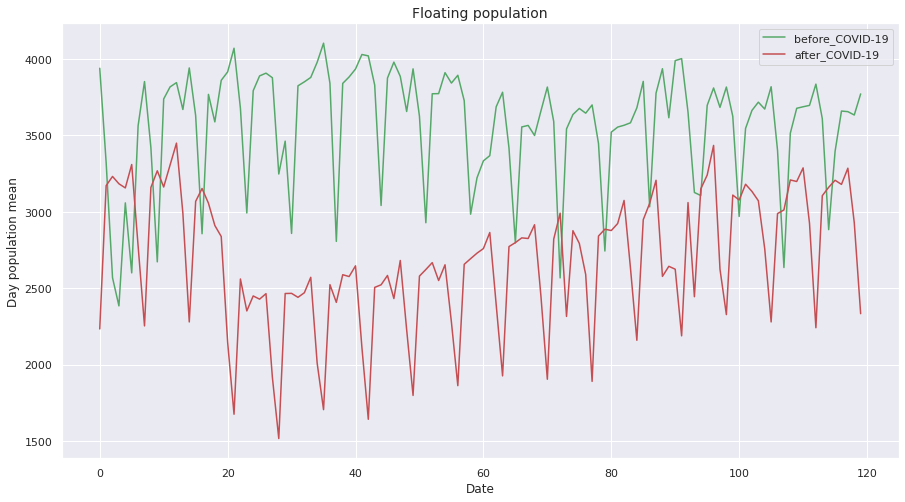

In [ ]:
nine_merged = pd.read_csv("/content/drive/My Drive/bigcon/nine_merged.csv",encoding='euc-kr',index_col=0)
two_merged = pd.read_csv("/content/drive/My Drive/bigcon/two_merged.csv",encoding='euc-kr',index_col=0)

pop = pd.concat([nine_merged,two_merged])
#결측치 없음
pop.isna().sum().sum()

# 19년도 전체지역 평균에 대한 시계열
mean_2019 = nine_merged.groupby(nine_merged['STD_YMD']).mean().reset_index()
#일평균
mean_2019['day_mean'] = mean_2019.iloc[:,3:27].mean(axis=1).round()
mean_2019['STD_YMD'] = pd.to_datetime(mean_2019['STD_YMD'],format='%Y%m%d')
#20년도 전체지역 평균에 대한 시계열 비교
mean_2020 = two_merged.groupby(two_merged['STD_YMD']).mean().reset_index()
#일평균
mean_2020['day_mean'] = mean_2020.iloc[:,3:27].mean(axis=1).round()
mean_2020['STD_YMD'] = pd.to_datetime(mean_2020['STD_YMD'],format='%Y%m%d')

#플랏팅
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [15, 8]
index = [x for x in range(120)]
a = sns.lineplot(index,mean_2019.day_mean,  linewidth=1.5, color='g',label='before_COVID-19')
b = sns.lineplot(index,mean_2020.day_mean[1:], linewidth=1.5, color='r',label='after_COVID-19')

plt.title('Floating population',fontsize=14)
plt.ylabel('Day population mean',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.legend(loc='best')
plt.show()

COVID-19 이후, 동일 시기에 전반적인 유동인구 감소 확인, 지역별 차이 지도로 봐주면 좋을듯...

# 유통데이터

In [ ]:
retail =  pd.read_excel('/content/drive/My Drive/bigcon/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터 1.xlsx')
#해당지역 해당일자의 총 매출지수와 각 카테고리의 비율...
retail.shape

(14460, 13)

In [ ]:
#2019년도
#120일치 60개 지역
nine_retail = retail.iloc[:120*60]
#121일치 60개 지역
two_retail = retail.iloc[120*60:]

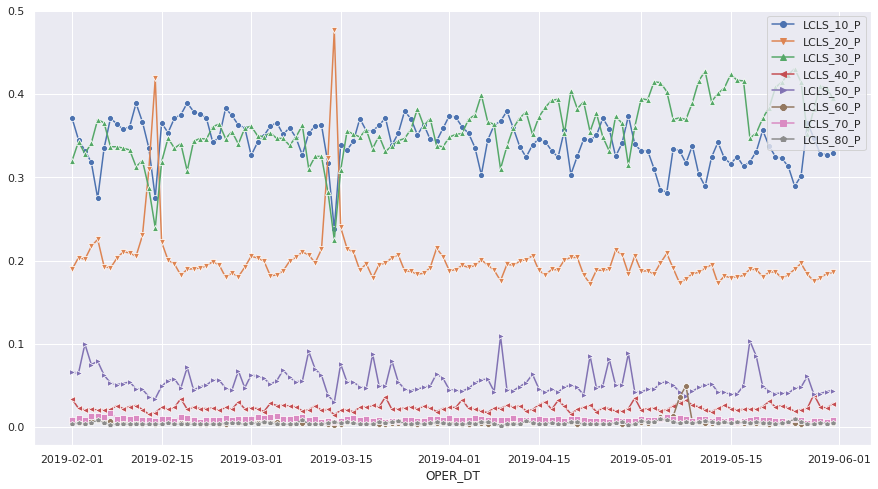

In [ ]:
#대구 모든지역 카테고리별 일평균  
#2019
deagu_2019 = nine_retail[nine_retail['PVN']=='대구광역시'].groupby([nine_retail['OPER_DT'],nine_retail['PVN']]).mean()
deagu_2019.index = pd.to_datetime(deagu_2019['OPER_DT'],format='%Y%m%d')
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data = deagu_2019.iloc[:,2:], dashes=False,markers=filled_markers)

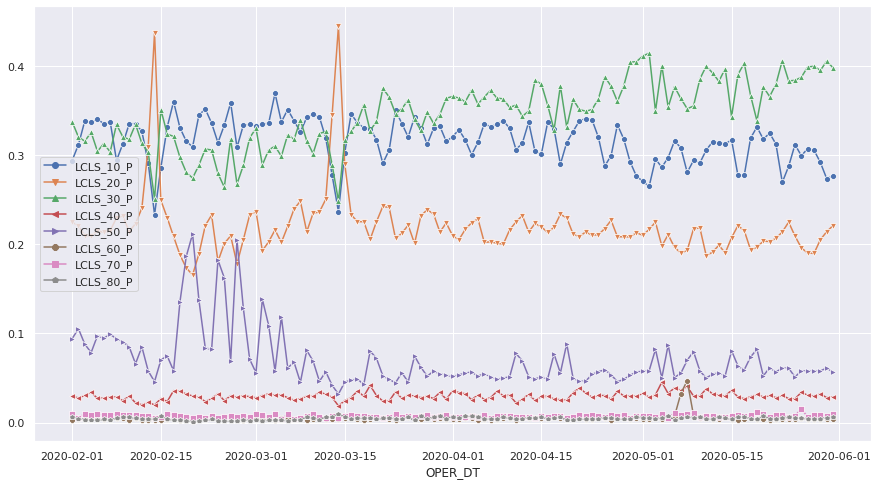

In [ ]:
#대구 모든지역 카테고리별 일평균  
#2020
deagu_2020 = two_retail[two_retail['PVN']=='대구광역시'].groupby([two_retail['OPER_DT'],two_retail['PVN']]).mean()
deagu_2020.index = pd.to_datetime(deagu_2020['OPER_DT'],format='%Y%m%d')
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data = deagu_2020.iloc[:,2:], dashes=False,markers=filled_markers)

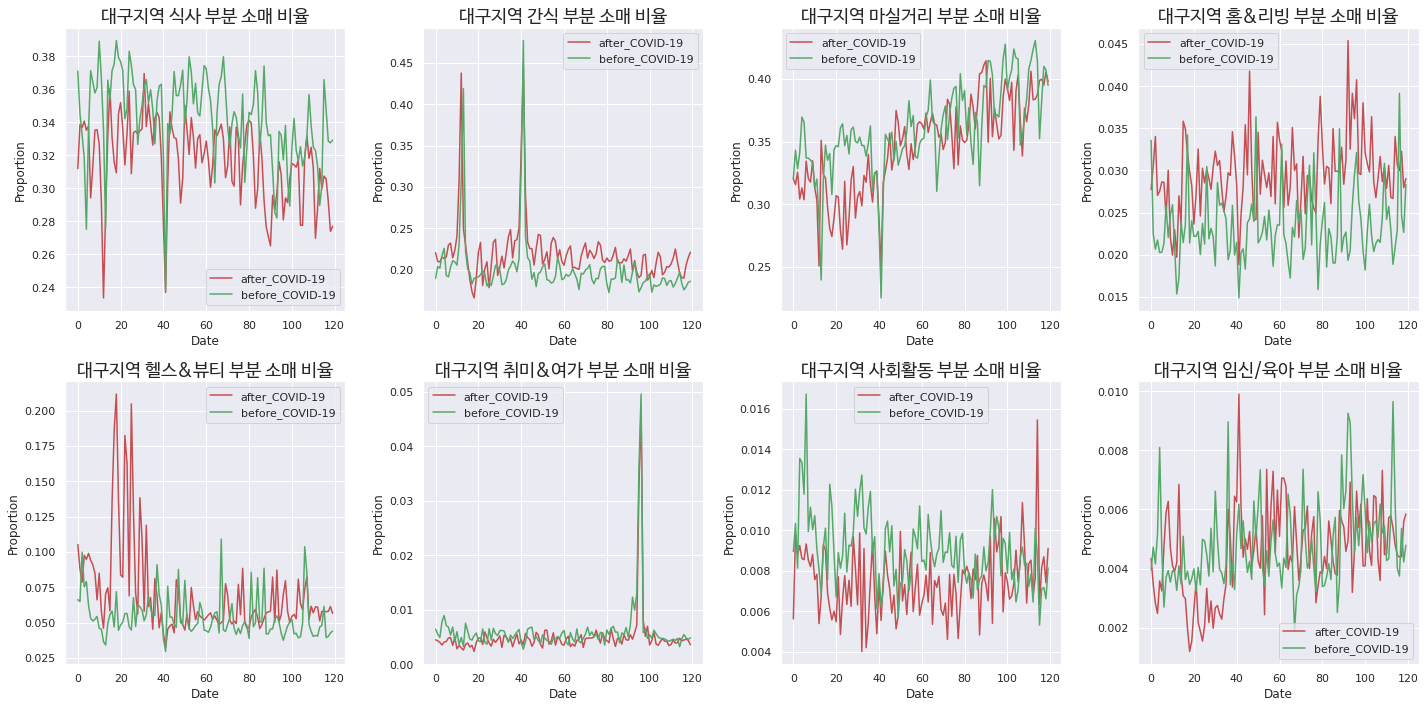

In [ ]:
# 항복별 차이
category = deagu_2020.columns[2:]
name = ['식사','간식','마실거리','홈&리빙','헬스&뷰티','취미&여가','사회활동','임신/육아','기호품'] 
sns.set()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i,j,k in zip(category,name,axes.flatten()):

  sns.lineplot(index,deagu_2020[i][1:],linewidth=1.5, color='r',label='after_COVID-19',ax=k)
  sns.lineplot(index,deagu_2019[i],  linewidth=1.5, color='g',label='before_COVID-19',ax=k)

  k.set_title('대구지역 '+ j +' 부분 소매 비율',fontsize=14, fontproperties=fontprop)
  k.set_ylabel('Proportion',fontsize=12)
  k.set_xlabel('Date',fontsize=12)
  k.legend(loc='best')

fig.tight_layout()

#식사부분 약간 감소, 간식부분 약간 상승, 홈리빙 크게 증가,
# 헬스 뷰티 단기적으로 증가, 사회활동 부분 전반적 감소, 연휴기간에 크게 증가

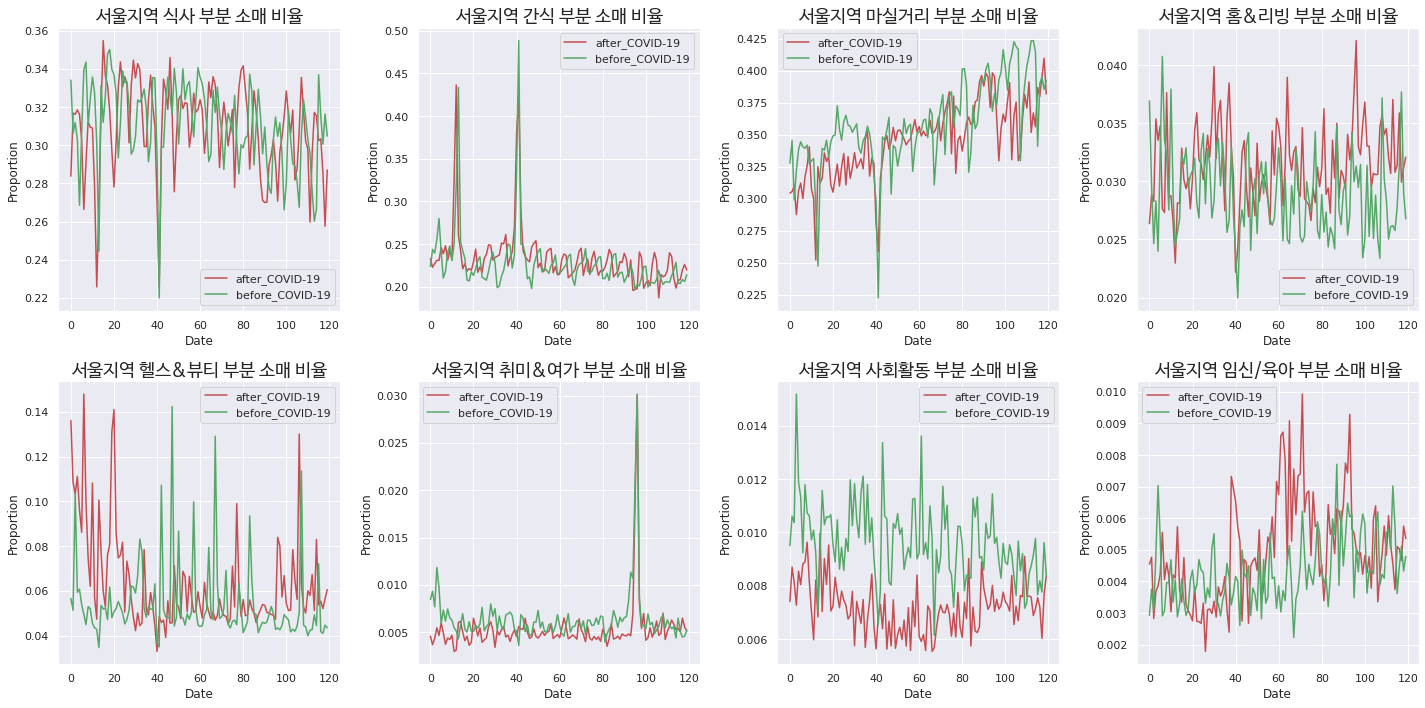

In [ ]:
seoul_2019 = nine_retail[nine_retail['PVN']=='서울특별시'].groupby([nine_retail['OPER_DT'],nine_retail['PVN']]).mean()
seoul_2019.index = pd.to_datetime(seoul_2019['OPER_DT'],format='%Y%m%d')

seoul_2020 = two_retail[two_retail['PVN']=='서울특별시'].groupby([two_retail['OPER_DT'],two_retail['PVN']]).mean()
seoul_2020.index = pd.to_datetime(seoul_2020['OPER_DT'],format='%Y%m%d')

category = seoul_2020.columns[2:]
name = ['식사','간식','마실거리','홈&리빙','헬스&뷰티','취미&여가','사회활동','임신/육아','기호품'] 
sns.set()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i,j,k in zip(category,name,axes.flatten()):

  sns.lineplot(index,seoul_2020[i][1:],linewidth=1.5, color='r',label='after_COVID-19',ax=k)
  sns.lineplot(index,seoul_2019[i],  linewidth=1.5, color='g',label='before_COVID-19',ax=k)

  k.set_title('서울지역 '+ j +' 부분 소매 비율',fontsize=14, fontproperties=fontprop)
  k.set_ylabel('Proportion',fontsize=12)
  k.set_xlabel('Date',fontsize=12)
  k.legend(loc='best')

fig.tight_layout()

#홈,리빙 부분 크게 증가, 헬스 뷰티 부분 크게 증가, 취미여가 소폭감소, 사회활동 부분 크게감소,
# 임신육아 부분 단기적 증가 
# 임신, 육아 부분을 제외하면 서울 지역과 큰 차이가 없는 것으로 보임.

## 두 데이터 병합 

In [ ]:
nine_pop = pd.read_csv("/content/drive/My Drive/bigcon/nine_merged.csv",encoding='euc-kr',index_col=0)
two_pop = pd.read_csv("/content/drive/My Drive/bigcon/two_merged.csv",encoding='euc-kr',index_col=0)
#120일치 69개 지역,121일치 69개 지역 
nine_pop.shape,two_pop.shape
#60개 지역, 120일치에 대해서만 join
nine_pop_retail = pd.merge(nine_pop,nine_retail, left_on =['HDONG_NM','STD_YMD'],right_on=['ADMD','OPER_DT'])
nine_pop_retail.to_csv("/content/drive/My Drive/bigcon/nine_pop_retail.csv")

In [ ]:
#60개 지역, 121일치에 대해서만 join
two_pop_retail = pd.merge(two_pop,two_retail, left_on =['HDONG_NM','STD_YMD'],right_on=['ADMD','OPER_DT'])
two_pop_retail.to_csv("/content/drive/My Drive/bigcon/two_pop_retail.csv")

# 카드 매출 데이터

In [ ]:
resident = glob('./02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/*')
foreigner = glob('./02_카드매출데이터(신한카드)/CARD_SPENDING_FOREIGNER/*')

resident_card = pd.read_csv(resident[0],sep = '	',encoding='euc-kr')
foreigner_card = pd.read_csv(foreigner[0],sep = '	',encoding='euc-kr')

In [ ]:
# 모든 변수 일별로,동별로 집계해주면 될 듯...
# 평균연령, 남여비, median cnt, median amt, MCT_CAT_CD

def get_sex_ratio(x):
  #남/여
  result = sum(x=='M')/sum(x=='F')
  return result
# 모든 품목에 더미변수 만들고 sum으로 집계해주는게 맞을듯
def get_cat(x):
  #최빈값
  result = x.value_counts().index[0]
  return result

resident_card_time_domain = resident_card.groupby([resident_card['STD_DD'],resident_card['DONG_CD']]).agg(
                                                  {'SEX_CD' : get_sex_ratio, 
                                                  'MCT_CAT_CD' :get_cat,
                                                  'AGE_CD' : np.median,
                                                  'USE_CNT':np.median,
                                                  'USE_AMT': np.median})
resident_card_time_domain = resident_card_time_domain.reset_index()

In [ ]:
# 동이름 string으로 디코딩
name = pd.read_excel('/content/drive/My Drive/bigcon/행정동코드.xlsx')
name_dict ={}
for i,j in zip(name['행정동코드'],name['행정동명']):
  name_dict[i] = j
resident_card_time_domain[['DONG_CD']] = resident_card_time_domain[['DONG_CD']].applymap(name_dict.get)

In [ ]:
#19년도
#47개 지역,120일
nine_card = resident_card_time_domain[:120*47]

#20년도
#47개지역, 121일
two_card = resident_card_time_domain[120*47:]

## 통합

In [ ]:
#38개 지역,120일에 대해서
nine_pop_retail_card = pd.merge(nine_pop_retail,nine_card, left_on =['HDONG_NM','STD_YMD'],right_on=['DONG_CD','STD_DD'])
nine_pop_retail_card.to_csv("/content/drive/My Drive/bigcon/nine_pop_retail_card.csv")

#38개 지역,121일에 대해서
two_pop_retail_card = pd.merge(two_pop_retail,two_card, left_on =['HDONG_NM','STD_YMD'],right_on=['DONG_CD','STD_DD'])
two_pop_retail_card.to_csv("/content/drive/My Drive/bigcon/two_pop_retail_card.csv")

In [ ]:
#서울 15개 지역
#대구 23개 지역
nine_pop_retail_card['PVN'].value_counts()/120

대구광역시    23.0
서울특별시    15.0
Name: PVN, dtype: float64

## 사업분야별 주문건수(카드데이터 이용)

In [ ]:
def get_sex_ratio(x):
  #남/여
  result = sum(x=='M')/sum(x=='F')
  return result
# 모든 품목에 더미변수 만들고 sum으로 집계해주는게 맞을듯
resident_card_cate = resident_card.join(pd.get_dummies(resident_card['MCT_CAT_CD']))
del resident_card_cate['MCT_CAT_CD']

#not dummy 
pd_1 = resident_card_cate.iloc[:,:7].groupby([resident_card_cate['STD_DD'],resident_card_cate['DONG_CD']]).agg(
                                                  {'SEX_CD' : get_sex_ratio, 
                                                  'AGE_CD' : np.median,
                                                  'USE_CNT':np.median,
                                                  'USE_AMT': np.median})
#dummy
pd_2 = resident_card_cate.iloc[:,7:].groupby([resident_card_cate['STD_DD'],resident_card_cate['DONG_CD']]).sum()

resident_card_cate = pd_1.join(pd_2).reset_index()

In [ ]:
resident_card_cate

,STD_DD,DONG_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,10,20,21,22,30,31,32,33,34,35,40,42,43,44,50,52,60,62,70,71,80,81,92
0,20190201,510,1.023810,45.0,27.0,1119.0,7,0,14,19,0,0,0,13,0,5,20,0,0,0,0,0,0,15,20,14,20,19,4
1,20190201,517,1.142857,40.0,27.0,595.0,6,1,8,0,0,1,3,17,1,0,20,0,0,0,0,4,0,7,18,11,20,17,1
2,20190201,520,1.014354,40.0,27.0,1212.0,20,6,30,29,0,0,1,32,5,0,40,14,0,8,23,27,0,27,39,31,40,39,10
3,20190201,530,1.142857,40.0,22.0,500.0,4,3,14,7,0,0,0,0,0,0,20,0,0,0,7,1,0,3,20,6,20,20,10
4,20190201,540,0.962025,45.0,27.0,752.0,16,22,22,17,0,0,11,22,13,17,40,21,6,19,34,20,0,20,40,35,40,40,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11322,20200531,690,1.338028,40.0,22.0,783.5,0,7,13,6,0,0,0,17,2,0,20,15,0,0,3,0,0,3,6,15,39,19,1
11323,20200531,695,0.954128,40.0,28.0,562.0,16,19,16,13,0,0,1,8,1,0,20,12,0,3,19,0,0,5,20,20,20,20,0
11324,20200531,700,0.923077,40.0,23.0,360.0,0,4,8,10,2,0,0,0,0,0,20,11,0,0,0,0,0,0,18,14,20,18,0
11325,20200531,710,1.155556,40.0,28.0,398.0,0,0,5,4,0,0,0,0,0,0,20,0,0,0,8,0,0,0,4,16,20,20,0


# 물류 데이터

In [ ]:
logistics = pd.read_excel('./05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')

In [ ]:
logistics_reduce = logistics[['DL_YMD','DL_GD_LCLS_NM','HDNG_NM','INVC_CONT']]
#코드는 다버리고, 동이름만 남기고, 물건종류는 더미변수로 해서 sum으로 reduce,송장건수도 sum
logistics_reduce = logistics_reduce.join(pd.get_dummies(logistics_reduce['DL_GD_LCLS_NM']))
del logistics_reduce['DL_GD_LCLS_NM']
logistics_reduce = logistics_reduce.groupby([logistics_reduce['DL_YMD'],logistics_reduce['HDNG_NM']]).sum()
del logistics_reduce['DL_YMD']
logistics_reduce = logistics_reduce.reset_index()
#날짜 인코딩 형식 맞춰주기
logistics_reduce['DL_YMD'] = [int('20' + str(x)) for x in logistics_reduce['DL_YMD']]

In [ ]:
#해결방법 생각해보기
#19년도
# 일자별로 해당지역에 물류이동이 없는 경우 발생..
nine_without_sns = pd.merge(nine_pop_retail_card,logistics_reduce, left_on =['HDONG_NM','STD_YMD'],right_on=['HDNG_NM','DL_YMD'])
#20년도
two_without_sns = pd.merge(two_pop_retail_card,logistics_reduce, left_on =['HDONG_NM','STD_YMD'],right_on=['HDNG_NM','DL_YMD'])

# sns 데이터

In [ ]:
sns = pd.read_csv('./03_SNS데이터(와이즈넛)/2020 bigcontest data_wisenut.csv',sep='')
sns.head()
#월단위로 집계되어 있음...

,SEQ,GU_CD,GU_NM(삭제),DONG_CD,DONG_NM(삭제),NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,NEWS_CNT_202003,NEWS_CNT_202004,NEWS_CNT_202005,BLOG_CNT_201902,BLOG_CNT_201903,BLOG_CNT_201904,BLOG_CNT_201905,BLOG_CNT_202002,BLOG_CNT_202003,BLOG_CNT_202004,BLOG_CNT_202005,CAFE_CNT_201902,CAFE_CNT_201903,CAFE_CNT_201904,CAFE_CNT_201905,CAFE_CNT_202002,CAFE_CNT_202003,CAFE_CNT_202004,CAFE_CNT_202005,UP_TOPIC_201902,UP_TOPIC_201903,UP_TOPIC_201904,UP_TOPIC_201905,UP_TOPIC_202002,UP_TOPIC_202003,UP_TOPIC_202004,UP_TOPIC_202005,UP1_POSITIVE_201902,UP1_POSITIVE_201903,UP1_POSITIVE_201904,...,UP2_NEGATIVE_201902,UP2_NEGATIVE_201903,UP2_NEGATIVE_201904,UP2_NEGATIVE_201905,UP2_NEGATIVE_202002,UP2_NEGATIVE_202003,UP2_NEGATIVE_202004,UP2_NEGATIVE_202005,UP3_NEGATIVE_201902,UP3_NEGATIVE_201903,UP3_NEGATIVE_201904,UP3_NEGATIVE_201905,UP3_NEGATIVE_202002,UP3_NEGATIVE_202003,UP3_NEGATIVE_202004,UP3_NEGATIVE_202005,UP4_NEGATIVE_201902,UP4_NEGATIVE_201903,UP4_NEGATIVE_201904,UP4_NEGATIVE_201905,UP4_NEGATIVE_202002,UP4_NEGATIVE_202003,UP4_NEGATIVE_202004,UP4_NEGATIVE_202005,UP5_NEGATIVE_201902,UP5_NEGATIVE_201903,UP5_NEGATIVE_201904,UP5_NEGATIVE_201905,UP5_NEGATIVE_202002,UP5_NEGATIVE_202003,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,140,서울 중구,520,소공동,4,6,16,34,26,3,9,8,139,595,810,398,212,152,94,196,13,1,76,80,289,122,102,6,"장관,기념식,창간,롯데호텔,뷔페","총동창회,서울대,박물관,월드비전,프로그램","기생충,반민특위,강원도,이재민,푯돌","동계올림픽,은퇴,여제,기자회견,눈물","롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자","직원,롯데호텔,콜센터,코로나,확진자","도시계획위원회,정비계획,재개발구역,서소문,정비수법","창조인상,생명과학부,예술감독,코로나19,RNA",5,111,113,...,0,0,1,0,9,0,0,1,2,4,768,0,10,14,1,2,0,1,309,1,24,5,0,6,0,4,117,1,29,0,24,0,7,11,186,5,1,6,0,10
1,2,140,서울 중구,540,회현동,4,0,8,27,15,25,5,10,230,512,789,508,226,319,121,320,16,46,87,73,295,134,126,9,"회현동,서울역,도시재생,윤동주,일제강점기","남산,케이블카,남산둘레길,국립극장,남산타워","서울지방경찰청,경복궁역,종교교회,용비어천가,종로구","저작권,녹색교통지역,기부채납,최고,인지","남산,남촌,중림,고도제한,개발제한","코로나19,남산둘레길,기부 행렬,랜드마크,남녀노소","코로나19,구조조정,산업단지,원장,각하","시민아파트,시범아파트,서울시장,충정아파트,회현",13,61,138,...,0,0,1,0,0,0,56,49,7,6,306,19,9,131,88,25,0,1,57,508,20,11,38,44,0,4,38,0,3,0,27,17,49,1,63,251,0,58,0,71
2,3,140,서울 중구,550,명동,6,16,29,44,162,45,38,33,499,1300,1633,1092,520,695,259,589,70,119,186,114,368,233,159,567,"생활유산,열쇠고리,신세계백화점,리뉴얼,관광객","문화재,도시재생사업,을지로,등록문화재,보존","반민특위,푯돌,충무로,생활형숙박시설,하늘N","중구,문화예술인,문화도시,쓰레기,미화원","롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자","확진자,중구,코로나,숙박시설,중국인","학원,코로나,확진자,집단감염,유흥업소","마스크,선별진료소,면마스크,천마스크,확진환자",106,356,699,...,3,9,1,0,2,3,6,107,24,128,594,625,38,230,71,330,5,40,336,565,193,369,91,354,0,33,115,25,226,260,35,46,34,74,226,137,17,84,22,326
3,4,140,서울 중구,570,필동,0,1,5,24,2,25,17,5,186,506,747,680,142,216,77,246,13,57,60,71,280,127,71,0,"저작권,영남상생포럼,자유한국장,지적,그랜드호텔","저작권,다가구주택,주주총회,주식회사,보증금","저작권,등록,기간,매각,유산","비용,주소,등록,신용불량자,유산","인테리어,도배장판,업체,거실,비용","케이블카,남산둘레길,남산타워,국립극장,남산","코로나,업종,감소율,자영업자,재난","코로나19,본점,주류,리스,양도",32,60,2,...,0,0,1,0,0,0,3,1,4,22,274,50,9,79,1,5,0,31,4,508,0,15,0,1,0,22,10,6,0,0,24,0,1,17,162,14,0,46,22,37
4,5,140,서울 중구,580,장충동,13,8,13,34,20,2,17,3,213,694,886,326,287,345,104,458,13,51,66,84,351,165,142,60,"빵집,태극당,신라호텔,세관,감사원","프로포폴,호텔신라,이부진,투약,불법","신부,예비신랑,신라호텔,대학병원,결혼식","덴마크,왕세자,명예시민증,왕세자비,신라호텔","호텔신라,한옥호텔,착공,전통호텔,도시계획위원회","호텔신라,이부진,신라면세점,신라호텔,착공","코로나,업종,감소율,자영업자,재난","코로나,신세계조선호텔,브랜드,한옥호텔,특급호텔",29,140,363,...,0,0,2,3,7,0,3,81,34,26,87,57,28,31,45,103,0,8,9,0,10,17,53,155,0,4,2,0,37,0,8,17,0,0,199,12,5,0,22,125


1. 지역별 특성값을 일별로 산출하기
  - 유동인구 + sns + 물류 +유통
  - 타임인덱스 기준으로 조인하기..
  - 시간에 따른 물류,소비의 증가를 업종별로 보기
  - 전년도와 비교해서 계절성분을 제거하기
  - 하나의 지표값으로 업종별로 지표 매기기
 

2. 업종별 특성값을 일별로 산출하기
  - 나머지 자료를 이용하여...

3. 지리적으로 보기????

4. 코로나 확진자 수도 같이 넣어서 인과관계보기??
  - 가정을 잡고, 가정을 확인하고 서비스로 이어주기

5. 데이터 창의적으로 결합하여 보기
  - 결합하였을 때, 보이는 문제점을 발견하고 그것을 numeric하게 해결